In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder, LabelBinarizer #encodage
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler #normalisation
from sklearn.preprocessing import PolynomialFeatures #création de polynomes
from sklearn.preprocessing import PowerTransformer #transformation non linéiare
from sklearn.preprocessing import Binarizer, KBinsDiscretizer #discrétisation
from sklearn.preprocessing import FunctionTransformer #personnalisation

# Transformer Sklearn

In [3]:
X = np.array(['chat',
               'chien',
               'chat',
               'oiseau'])

In [4]:
#méthode fit
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [5]:
#méthode transform
transformer.transform(X)

array([0, 1, 0, 2])

In [6]:
#méthode fit & transform
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

# Encodage(variable qualitatives)
ordinal & One-hot

# ordinal

In [7]:
#LabelEncoder : encode les classes & les variables catégoriques(y) en numérique
y = np.array(['chat','chien','chat','oiseau'])
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [8]:
#inverse_transform : décoder les données
encoder.inverse_transform(np.array([0,0,2,2]))

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [9]:
#ordinal encoder : encode les variables catégoriques(X) en numérique
X = np.array([['chat', 'poils'],
             ['chien', 'poils'],
             ['chat', 'poils'],
             ['oiseau', 'plumes']])
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

# One Hot(Matrise creuse:des uns)

In [10]:
#LabelBinarizer : encode les classes & les variables catégoriques(y) en One-Hot
y = np.array(['chat','chien','chat','oiseau'])
encoder = LabelBinarizer()
encoder.fit_transform(y)
#encoder = LabelBinarizer(sparse_output=True) matrice compressée en CSR

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [11]:
#One-Hot Encoder : encode les variables catégoriques(X) en One-Hot
X = np.array([['chat', 'poils'],
             ['chien', 'poils'],
             ['chat', 'poils'],
             ['oiseau', 'plumes']])
encoder = OneHotEncoder()
encoder.fit_transform(X) #matrice devient compressée

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# Normalisation(variables quantitatives)
But : converger le fct cout vers le minimum

==> sensible au outliers(data difficile à exploiter)

# Normalisation MinMax (transforme chaque var X pour etre entre 0 et 1(par calculs))

fit_transform(X_train);

    X_train_scaled = (X_train - X_train_min) / (X_train_max-X_train_min)

transform(X_test);

    X_test_scaled = (X_test - X_train_min) / (X_train_max-X_train_min)

In [12]:
X = np.array([[70],
              [80],
               [120]])

In [13]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [14]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

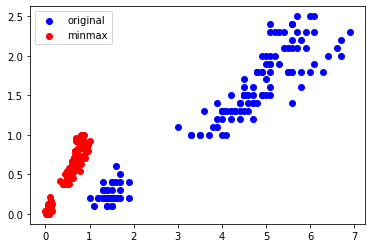

In [15]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 

iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], c='b')
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], c='r')

plt.legend(['original', 'minmax'])
plt.show() #normalisation entre [0,1]

# Standardisation (standardise chaque variable X : la moyenne est nulle et l'écart type=1)

Xscaled = (X - Moyenne_X) / écart_type

In [16]:
X = np.array([[70],
              [80],
               [120]])

In [17]:
scaler = StandardScaler()
scaler.fit_transform(X) #std=1 ; moy=0

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

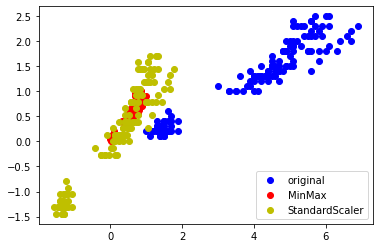

In [25]:
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)

#comparaison entre courbe minmax & standard
plt.scatter(X[:, 2], X[:, 3], c='b')
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], c='r')
plt.scatter(X_std[:, 2], X_std[:, 3], c='y')

plt.legend(['original', 'MinMax', 'StandardScaler', 'RobustScaler'])
plt.show() #normalisation entre [0,1]

# RobustScaler (trés peu sensible au outliers)

Xscaled = (X - mediane) / IQR

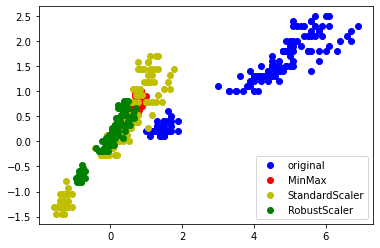

In [24]:
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

#comparaison entre courbe original & RobustScaler
plt.scatter(X[:, 2], X[:, 3], c='b')
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], c='r')
plt.scatter(X_std[:, 2], X_std[:, 3], c='y')
plt.scatter(X_robust[:, 2], X_robust[:, 3], c='g')

plt.legend(['original', 'MinMax', 'StandardScaler', 'RobustScaler'])
plt.show() #normalisation entre [0,1]

# PolynomialFeatures

In [30]:
X = np.array([[1],
             [2],
             [0.5]])
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

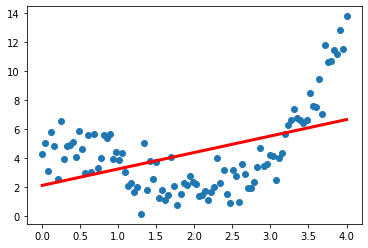

In [38]:
X=np.linspace(0,4,100).reshape((100,1))
y=X**2+5*np.cos(X)+np.random.randn(100,1)

plt.scatter(X,y)

model = LinearRegression().fit(X,y)
y_pred=model.predict(X)
plt.plot(X,y_pred,c='r',lw=3)

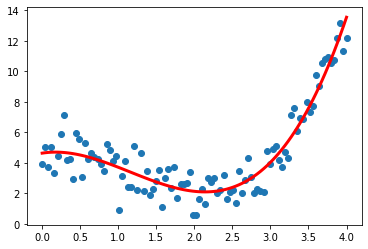

In [41]:
X=np.linspace(0,4,100).reshape((100,1))
y=X**2+5*np.cos(X)+np.random.randn(100,1)

plt.scatter(X,y)

X_poly=PolynomialFeatures(3).fit_transform(X) #modéle bien plus sofistiquée et performant

model = LinearRegression().fit(X_poly,y)
y_pred=model.predict(X_poly)
plt.plot(X,y_pred,c='r',lw=3)

# PowerTransformer (Transformation non linéaire)

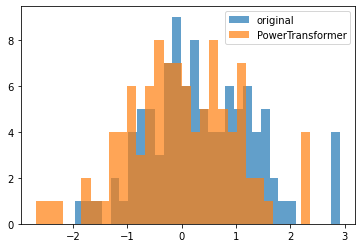

In [52]:
np.random.seed(0)
X = np.random.rand(100, 2) + np.random.randn(100, 2)

X2 = PowerTransformer().fit_transform(X)
   
plt.hist(X[:,0], bins=30, alpha=0.7, label='original')
plt.hist(X2[:,0], bins=30, alpha=0.7, label='PowerTransformer')
plt.legend()
plt.show()

# Discrétisation

In [57]:
#Transformer Binarizer : diviser variable en deux catégories
X = np.linspace(0, 5, 10).reshape(10, 1)
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [63]:
np.hstack((X, Binarizer(threshold = 3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [64]:
#KBinsDiscretizer : division en plus que deux catégorie
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# Personnalisation (FunctionTransformer)

In [67]:
X=np.linspace(1,5,10).reshape((-1,1))
Mon_transformer = FunctionTransformer(func=np.log1p,
                                   inverse_func=np.expm1)
Mon_transformer.fit_transform(X)

array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])

# Pipeline & Composite Estimator

1. Une pipeline est simple à utiliser
2. Sécurisé(pas des fuites des datas ou des datas mal transformées)
3. permet de faire des cross validation

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

1ére méthode

In [71]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
#Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

#Estimateur
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

#Test
X_test_tranformed = scaler.transform(X_test)
model.predict(X_test_tranformed)

array([1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 0])

Solution de remplacer la 1ére méthode

In [100]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(),
                      SGDClassifier())
model.fit(X_train,y_train)
model.predict(X_test)

array([1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 0, 2, 1, 1, 0])

# Pipeline GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

In [106]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state = 0))
#model
params={
    'polynomialfeatures__degree' : [2,3,4],
    'sgdclassifier__penalty' : ['l1','l2']
}
grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [107]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'sgdclassifier__penalty': 'l1'}

In [108]:
grid.score(X_test, y_test)

0.9